In [3]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import FortranFile
from nbodykit.lab import *

from colossus.cosmology import cosmology
cosmo_c = cosmology.setCosmology('planck15')

In [4]:
def measure_autopk(array,L):
    mesh = ArrayMesh(array,BoxSize=L)
    r = FFTPower(mesh, mode='1d')
    return r.power

In [6]:
def plot_slice(a1,start):
    cmap = plt.get_cmap('jet')
    start = start
    c = a1[:,start,:]
    #c = scipy.ndimage.interpolation.zoom(c ,order=1, zoom=2)
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    im = plt.imshow((c.T),interpolation='bilinear',origin='lower',aspect='auto',cmap=cmap)
    ax.set_aspect('equal')

    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "5%", pad="2%")
    cb = plt.colorbar(im,orientation='vertical',cax=cax)
    cb.ax.get_yaxis().labelpad = 0.
    plt.show()

In [181]:
def noise(nc):
    np.random.seed(1)
    # Build a unit-distribution of complex numbers 
    a = np.random.normal(loc=0, scale=1, size=(nc,nc,nc))
    b = np.random.normal(loc=0, scale=1, size=(nc,nc,nc))
    return a + 1j * b

[]

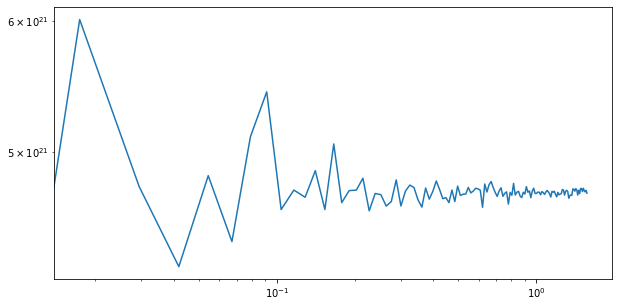

In [189]:
TEST = np.random.normal(loc=0, scale=1, size=(nc,nc,nc))
TESTF =  np.fft.fftn(TEST)
a = measure_autopk(TESTF,L)
plt.figure(figsize=(10,5))
plt.plot(a['k'],a['power']/L**(3)*nc**(6))
plt.loglog()

In [182]:
L=512
nc=256
wn = noise(nc)


In [185]:
a = measure_autopk(wn,L)

[]

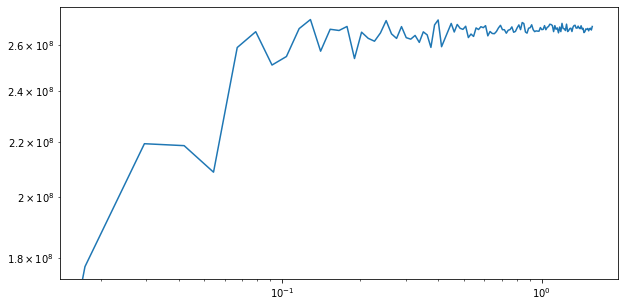

In [186]:
plt.figure(figsize=(10,5))
plt.plot(a['k'],a['power'])
plt.loglog()

In [166]:
k,p = np.loadtxt('Pk.input_zinit_normalized_at_z0.DAT',unpack=True)
p*=cosmo_c.growthFactor(100)*cosmo_c.growthFactor(100)

In [167]:
def k_box(nc,L):
    kfac = 2.*np.pi/L
    k= np.fft.fftfreq(nc,d=1./nc/kfac) #d controls spacing
    a = np.transpose(np.indices((nc,nc,nc)).T, (2, 1, 0, 3)) #1 grid cell 3 coordinates
    k2=(k[a]**2).sum(axis=-1) # each grid cell is sum of squares of coordinates
    return np.sqrt(k2).astype(np.float16)

In [168]:
kbox = k_box(nc,L)
Pk_box = np.interp(kbox,k,p)

In [169]:
L**3/1E8

1.34217728

In [125]:
2*np.pi/L

0.01227184630308513

In [170]:
wnpk = wn *np.sqrt(Pk_box/L**(3)*nc**(6))
deltapk = np.fft.ifftn(wnpk)

In [171]:
b = measure_autopk(deltapk.real,L)


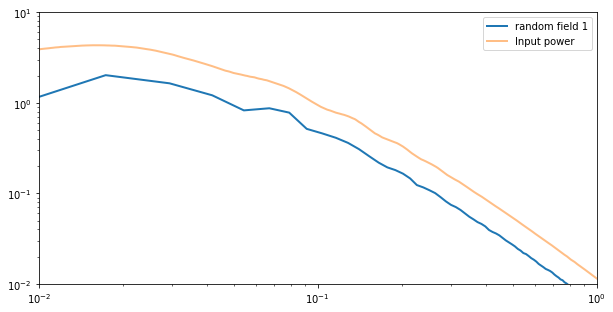

In [172]:
plt.figure(figsize=(10,5))
plt.plot(b['k'].real,b['power'].real,lw=2,label="random field 1")
plt.plot(k,p,alpha=0.5,lw=2,label="Input power")
plt.loglog()
plt.xlim(0.01,1)
plt.ylim(1E-2,1E1)
plt.legend()

In [129]:
Pk_measure = 0.5*np.abs(wn)**2

In [191]:
Pk_measure.shape

(256, 256, 256)

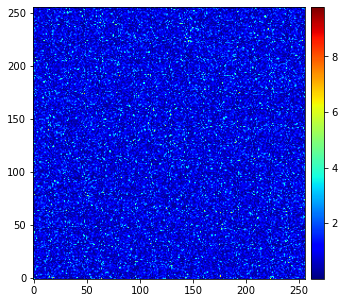

In [130]:
plot_slice(Pk_measure,128)

In [193]:
wnfix = wn/np.sqrt(Pk_measure)


In [199]:
wnfix[0,0,:10]

array([ 1.89118194-0.65071565j, -0.69392645-1.87575747j,
       -0.64375842-1.89356149j, -1.49740854-1.3258083j ,
        1.38458551-1.44323351j, -1.76498786+0.94064756j,
        1.9371629 -0.49739311j, -1.06404667+1.69345938j,
        1.80522089+0.86091669j, -0.35341776+1.96852632j])

In [200]:
a = measure_autopk(wnfix.real,L)
b = measure_autopk(wnfix.imag,L)

[]

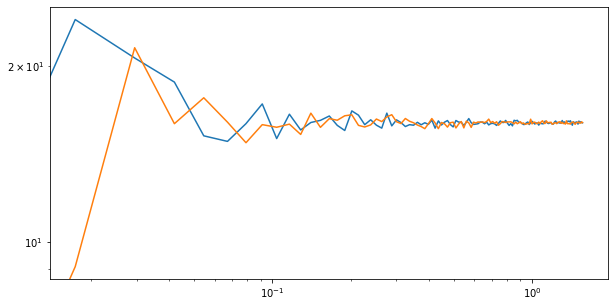

In [201]:
plt.figure(figsize=(10,5))
plt.plot(a['k'].real,a['power'].real)
plt.plot(b['k'].real,b['power'].real)

plt.loglog()

In [134]:
wnpkfix = wnfix *np.sqrt(Pk_box/L**(3)*nc**(6))

In [135]:
deltapkfix = np.fft.ifftn(wnpkfix)

In [136]:
b1 = measure_autopk(deltapkfix.real,L)


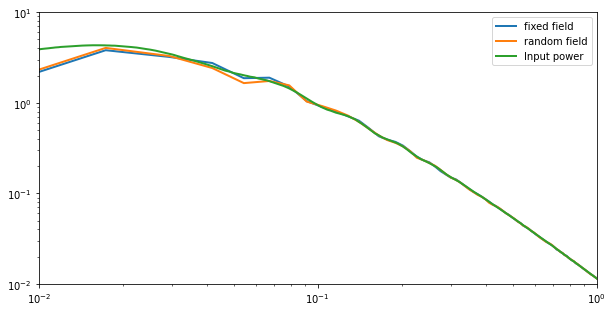

In [137]:
plt.figure(figsize=(10,5))
plt.plot(b1['k'].real,b1['power'].real,lw=2,label="fixed field")
plt.plot(b['k'].real,b['power'].real,lw=2,label="random field")
plt.plot(k,p,lw=2,label="Input power")
plt.loglog()
plt.xlim(0.01,1)
plt.ylim(1E-2,1E1)
plt.legend()

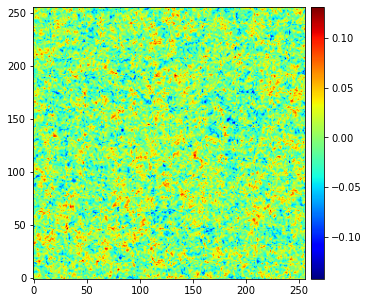

In [138]:
plot_slice(deltapk.real,128)

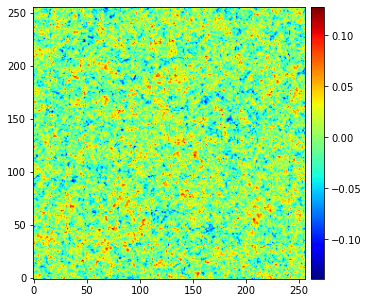

In [139]:
plot_slice(deltapkfix.real,128)

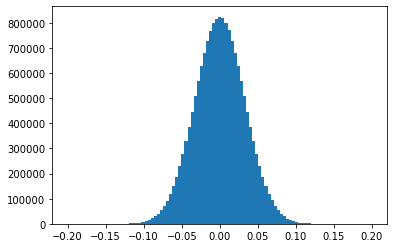

In [140]:
_ = plt.hist(deltapk.real.ravel(),bins=np.linspace(-0.2,0.2,100))

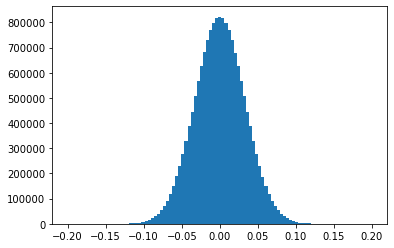

In [141]:
_ = plt.hist(deltapkfix.real.ravel(),bins=np.linspace(-0.2,0.2,100))

In [142]:
wnpk_abs = np.abs(wnpk)
wnpk_phase = np.angle(wnpk)

wnpkfix_abs = np.abs(wnpkfix)
wnpkfix_phase = np.angle(wnpkfix)


(array([1676402., 1677494., 1677737., 1678579., 1679556., 1677986.,
        1678170., 1675597., 1678647., 1677048.]),
 array([-3.14159236e+00, -2.51327390e+00, -1.88495543e+00, -1.25663697e+00,
        -6.28318502e-01, -3.69911692e-08,  6.28318428e-01,  1.25663689e+00,
         1.88495536e+00,  2.51327382e+00,  3.14159229e+00]),
 <BarContainer object of 10 artists>)

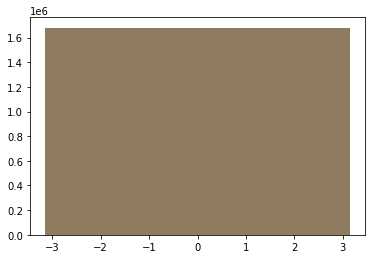

In [149]:
plt.hist(wnpk_phase.ravel())
plt.hist(wnpkfix_phase.ravel(),alpha=0.5)

[]

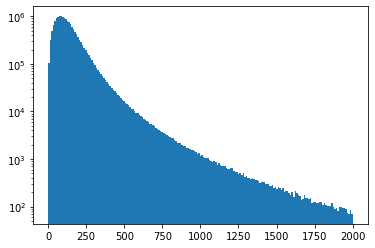

In [143]:
_=plt.hist(wnpk_abs.ravel(),bins=np.linspace(0,2000,200))
plt.semilogy()


[]

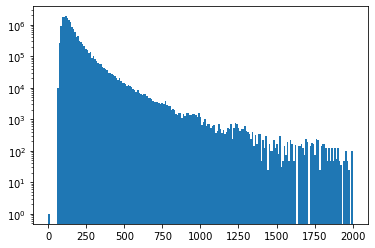

In [144]:
_=plt.hist(wnpkfix_abs.ravel(),bins=np.linspace(0,2000,200))
plt.semilogy()

[]

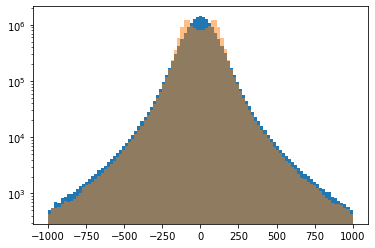

In [147]:
_=plt.hist(wnpk.real.ravel(),bins=np.linspace(-1000,1000,100))
_=plt.hist(wnpkfix.real.ravel(),bins=np.linspace(-1000,1000,100),alpha=0.5)
plt.semilogy()

[]

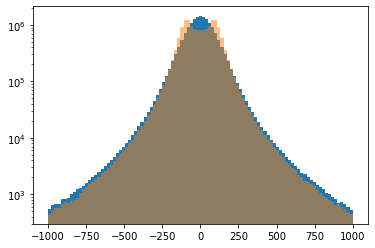

In [146]:
_=plt.hist(wnpk.imag.ravel(),bins=np.linspace(-1000,1000,100))
_=plt.hist(wnpkfix.imag.ravel(),bins=np.linspace(-1000,1000,100),alpha=0.5)
plt.semilogy()

In [94]:
def write_music(dens):
    seed=1
    header = np.array([nc,nc,nc,seed],dtype=np.int32)
    file_out = "IC.dat"
    f = FortranFile(file_out, 'w')
    f.write_record((header))
    for i in range(nc): #z dim
        f.write_record(dens[:,:,i])
    f.close()
    return f